Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Each question is worth 25 points.

This homework is due Friday, September 22, 2017.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Question 1

The data below provides counts of a flour beetle (Tribolium confusum) population at various points in time:

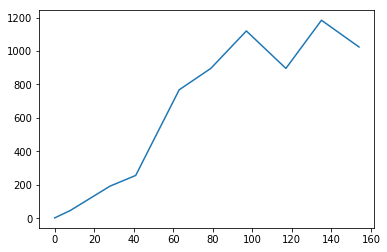

In [4]:
days = 0,8,28,41,63,79,97,117,135,154
beetles = 2,47,192,256,768,896,1120,896,1184,1024
n_0=beetles[0]
plt.plot(days, beetles)

An elementary model for population growth is the logistic model:

$$\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right)$$

where $N$ is population size, $t$ is time, $r$ is a growth rate parameter, and $K$ is a parameter that represents the population carrying capacity of the environment. The solution to this differential equation is given by: 

$$N_t = f(t) = \frac{KN_0}{N_0 + (K - N_0)\exp(-rt)}$$

where $N_t$ denotes the population size at time $t$. 

1. Fit the logistic growth model to the flour beetle data using optimization to minimize the sum of squared errors between model predictions and observed counts.

2. In many population modeling applications, an assumption of lognormality is adopted. The simplest assumption would be that the $\log(N_t)$ are independent and normally distributed with mean $\log[f(t)]$ and variance $\sigma^2$. Find the MLEs under this assumption, and provide estimates of standard errors and correlation between them.

# question 1 Fit the logistic growth model to the flour beetle data using optimization to minimize the sum of squared errors between model predictions and observed counts

In [19]:
# Write your answer here
#question 1
#set up N(t) and squared error
n_0=beetles[0]
def pred(r,k,t): #prediction
    nt=(k*n_0)/(n_0+(k-n_0)*np.exp(-r*t))
    return nt

def sse(para):
    error=0
    for i in np.arange(len(days)):
        error=error+ ( pred(para[0], para[1], days[i]) - beetles[i])**2
    return error

In [20]:
from scipy.optimize import minimize 

res = minimize(sse, [1,1],method="BFGS")
r=res.x[0]
k=res.x[1]


/Users/ying/anaconda2/envs/bios8366/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [21]:
print(r,k)

0.117958564228 1033.51527207


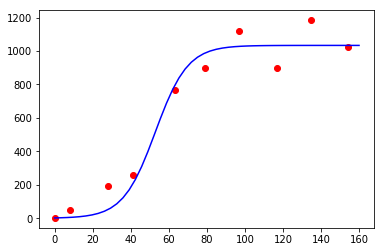

In [75]:
fig, ax = plt.subplots()
t = np.linspace(0, 160)
ax.plot(days,beetles,"ro",label="beetles")
ax.plot(t, pred(r,k,t),"b-",label="estimates")
ax.legend()

## question2. in many population modeling applications, an assumption of lognormality is adopted. The simplest assumption would be that the  log(Nt). Find the MLEs under this assumption, and provide estimates of standard errors and correlation between them.

In [5]:
import math

In [61]:
from scipy.stats import norm
log_Nt=np.log(beetles)

def pred(r,k,t): #prediction
    nt=(k*n_0)/(n_0+(k-n_0)*np.exp(-r*t))
    return nt

def normlog(para):#3 parametes; r, k, sigma
    log_ft = []
    total=0
    for i in np.arange(len(days)):
        log_ft.append(np.log ( pred(para[0], para[1], days[i])) ) #get the log of predicted Nt
    
#using minimizor so take -log as function to get mle
    total=(-1)*norm.logpdf(x=log_Nt,loc=log_ft,scale = para[2]).sum() 
    return total

In [66]:

from scipy.optimize import minimize 


res = minimize(normlog, [0.1,1000,1],method="Nelder-Mead")
res

 final_simplex: (array([[  1.92620487e-01,   8.20358541e+02,   6.44076054e-01],
       [  1.92620503e-01,   8.20358470e+02,   6.44076050e-01],
       [  1.92620468e-01,   8.20358503e+02,   6.44076027e-01],
       [  1.92620507e-01,   8.20358465e+02,   6.44076096e-01]]), array([ 9.7900007,  9.7900007,  9.7900007,  9.7900007]))
           fun: 9.7900007035655001
       message: 'Optimization terminated successfully.'
          nfev: 175
           nit: 95
        status: 0
       success: True
             x: array([  1.92620487e-01,   8.20358541e+02,   6.44076054e-01])

In [82]:
from scipy import optimize
optimize.fmin_bfgs(normlog,[0.1,1000,1],full_output=True)

Optimization terminated successfully.
         Current function value: 8.842811
         Iterations: 30
         Function evaluations: 175
         Gradient evaluations: 35


(array([  4.00460900e-01,   6.72090369e+02,   5.85869937e-01]),
 8.842810568146515,
 array([ -2.38418579e-07,   0.00000000e+00,   7.15255737e-07]),
 array([[  8.86599639e-03,  -4.90206388e-01,  -3.17471815e-04],
        [ -4.90206388e-01,   1.29341906e+04,   2.26679327e-01],
        [ -3.17471815e-04,   2.26679327e-01,   1.76733509e-02]]),
 175,
 35,
 0)

In [67]:
r=res.x[0]
k=res.x[1]
s=res.x[2]

In [53]:
print(r,k,s)

-5.40148148148 13679.6296296 27.9037037037


/Users/ying/anaconda2/envs/bios8366/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


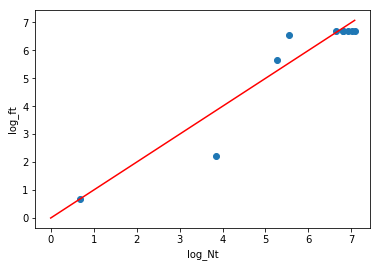

In [94]:
#use a qqplot to visualize logNt and log(ft)
log_ft = []
for i in np.arange(len(days)):
    log_ft.append(np.log ( pred(r, k, days[i])) )
fig, ax = plt.subplots()
ax.scatter(sorted(log_Nt), sorted(log_ft))
ax.plot(np.linspace(0,max(log_Nt)),np.linspace(0,max(log_Nt)),"r-")
plt.xlabel("log_Nt")
plt.ylabel("log_ft")
ax.legend()

## Question 2

1. Implement simulated annealing for minimizing the AIC for the baseball salary regression problem. Model your algorithm on the example given in class. 

    1. Compare the effects of different cooling schedules (different temperatures and different durations at each temperature).  
    2. Compare the effect of a proposal distribution that is discrete uniform over 2-neighborhoods versus one that is discrete uniform over 3-neighborhoods.

2. Implement a genetic algorithm for minimizing the AIC for the baseball salary regression problem. Model your algorithm on Example 3.5. 

    1. Compare the effects of using different mutation rates.  
    2. Compare the effects of using different generation sizes.  
    3. Instead of the selection mechanism used in the class example, try using independent selection of both parents with probabilities proportional to their fitness.



In [77]:
baseball = pd.read_table('../data/baseball.dat', sep='\s+') #read data


## question 1(a)-1. compare effects of different cooling schedules (different temperatures with fixed schedules)

In [78]:
#setup 
from sklearn.linear_model import LinearRegression
aic = lambda g, X, y: len(y) * np.log(sum((g.predict(X) - y)**2)/len(y)) + 2*g.rank_
predictors = baseball.copy()
logsalary = predictors.pop('salary').apply(np.log)
nrows, ncols = predictors.shape


In [86]:
#compare different temparatures with fixed durations
def aic_temp(tau_start): #change tau_start, write a function of start temperature
    
    cooling_schedule = [tau_start]*60 + [tau_start/2]*120 + [tau_start/10]*240 #durations remain same: 60,120,240
    aic_values = []
    
    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]
    g = LinearRegression().fit(X=solution_vars, y=logsalary)
    aic_best = aic(g, solution_vars, logsalary)
    aic_values.append(aic_best)
    
    for tau in cooling_schedule:
        
        # Random change 1-neighborhood
        flip = np.random.randint(0, ncols)
        solution_current[flip] = not solution_current[flip]
        solution_vars = predictors[predictors.columns[solution_current]]
        g = LinearRegression().fit(X=solution_vars, y=logsalary)
        aic_step = aic(g, solution_vars, logsalary)
        alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau))

        if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
        # Accept proposed solution
            aic_values.append(aic_step)
            if aic_step < aic_best:
            # Replace previous best with this one
                aic_best = aic_step
                solution_best = solution_current.copy()
        else:
        # Revert solution
            solution_current[flip] = not solution_current[flip]
            aic_values.append(aic_values[-1])
            
    return aic_values,aic_best,solution_best

In [122]:
#store the result from different temparatures
a20,b20,c20=aic_temp(40)
a15,b15,c15=aic_temp(20)
a10,b10,c10=aic_temp(10)
a5,b5,c5=aic_temp(5)
a1,b1,c1=aic_temp(1)

compare the iteration numbers under different temparatures:
We look at 5 differnet start temparatures: 40,20,15, 5,1. We compare the best AIC, iterature time to best AIC in the table below. From this result: If start temparature is too high (40 here), best AIC are not low enough; for temparaturess 20, 10 and 5, iterature numbers to best AIC are similar and the best AIC is also similar; if start with low temparature (1), may take much less iteration number to best AIC

In [123]:
tempsum = pd.DataFrame({'temperature':[40,20,10,5,1],
                    'best AIC':[b20,b15,b10,b5,b1],
                     'iteration number to best AIC':[np.where(a20==b20)[0][0],np.where(a15==b15)[0][0],np.where(a10==b10)[0][0],np.where(a5==b5)[0][0],np.where(a1==b1)[0][0]]
                     #'phylum':[np.where(c20==True),np.where(c15==True),np.where(c10==True),np.where(c5==True),np.where(c1==True)]})
                    })
tempsum

,best AIC,iteration number to best AIC,temperature
0,-410.777330,333,40
1,-418.153267,401,20
2,-417.769109,392,10
3,-418.271700,411,5
4,-418.554287,147,1


compare the predictors in best AIC, we see some are used by several different temparatures: e.g. predictors 2,5,7,9,12,13,19. These predictors may have more impact to salary than others.

In [124]:

print(  np.where(c20==True) )
print( np.where(c15==True))
print( np.where(c10==True) )
print( np.where(c5==True) )
print( np.where(c1==True) )

(array([ 3,  7,  8,  9, 12, 13, 14, 19, 20, 21, 22, 24]),)
(array([ 2,  7,  9, 12, 13, 14, 15, 19, 23, 24, 26]),)
(array([ 2,  7,  9, 12, 13, 14, 15, 19, 21, 23]),)
(array([ 2,  5,  7,  9, 12, 13, 19, 20, 21, 24]),)
(array([ 2,  5,  7,  9, 10, 12, 13, 19, 20, 21, 23]),)


from the plot: we can see if start temparature is higher, start with high AIC are often linked with more iterations at high AIC. Ideally, we want a rapid decrease in temperature early in the simulation, for that, we may want to start with lower temparature.

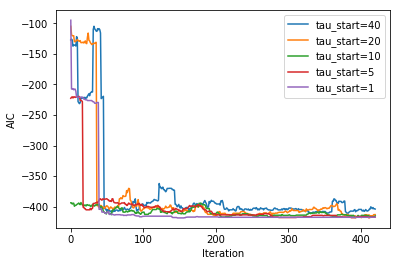

In [126]:
x = range(0, len(a10)) #plot and compare results
fig, ax = plt.subplots()
ax.plot(x, a20, label='tau_start=40')
ax.plot(x, a15, label='tau_start=20')
ax.plot(x, a10, label='tau_start=10')
ax.plot(x, a5, label='tau_start=5')
ax.plot(x, a1, label='tau_start=1')
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

## question 1(a)-2. compare effects of different cooling schedules (different durations at temparatures with fixed start temparature)

In [128]:
def aic_dura(theta): #change theta: duration at differnet temparature
    tau_start=10
    cooling_schedule = [tau_start]*theta[0] + [tau_start/2]*theta[1] + [tau_start/10]*theta[2] #durations remain same: 60,120,240
    aic_values = []
    
    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]
    g = LinearRegression().fit(X=solution_vars, y=logsalary)
    aic_best = aic(g, solution_vars, logsalary)
    aic_values.append(aic_best)
    
    for tau in cooling_schedule:
        
        # Random change 1-neighborhood
        flip = np.random.randint(0, ncols)
        solution_current[flip] = not solution_current[flip]
        solution_vars = predictors[predictors.columns[solution_current]]
        g = LinearRegression().fit(X=solution_vars, y=logsalary)
        aic_step = aic(g, solution_vars, logsalary)
        alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau))

        if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
        # Accept proposed solution
            aic_values.append(aic_step)
            if aic_step < aic_best:
            # Replace previous best with this one
                aic_best = aic_step
                solution_best = solution_current.copy()
        else:
        # Revert solution
            solution_current[flip] = not solution_current[flip]
            aic_values.append(aic_values[-1])
            
    return aic_values,aic_best,solution_best

In [140]:
c1,d1,e1=aic_dura([320,80,20])
c2,d2,e2=aic_dura([240,120,60])
c3,d3,e3=aic_dura([140,140,140])
c4,d4,e4=aic_dura([120,240,60])
c5,d5,e5=aic_dura([60,120,240])

In [149]:
tempsum = pd.DataFrame({'duration':["320-80-20","240-120-60","140-140-140","120-240-60","60-120-240"],
                    'best AIC':[d1,d2,d3,d4,d5],
                     'iteration number to best AIC':[np.where(c1==d1)[0][0],np.where(c2==d2)[0][0],np.where(c3==d3)[0][0],np.where(c4==d4)[0][0],np.where(c5==d5)[0][0]]
                     #'phylum':[np.where(c20==True),np.where(c15==True),np.where(c10==True),np.where(c5==True),np.where(c1==True)]})
                    })
tempsum

,best AIC,duration,iteration number to best AIC
0,-414.179542,320-80-20,386
1,-416.505599,240-120-60,420
2,-418.259149,140-140-140,324
3,-415.663528,120-240-60,200
4,-418.213950,60-120-240,308


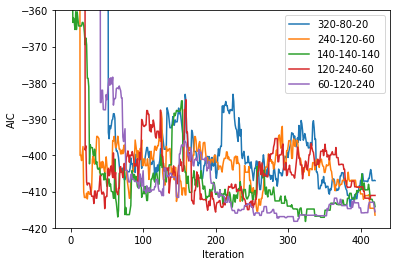

In [152]:
x = range(0, len(c3)) #plot and compare results
fig, ax = plt.subplots()
ax.plot(x, c1, label='320-80-20')
ax.plot(x, c2, label='240-120-60')
ax.plot(x, c3, label='140-140-140')
ax.plot(x, c4, label='120-240-60')
ax.plot(x, c5, label='60-120-240')
plt.ylim(-420, -360)
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

Compare different curves here: we can see if we more runs near best AIC, cooling schedules with shorter time at high temparature and longer running time at low temparature are more ideal.

## question 1(b)  Compare the effect of a proposal distribution that is discrete uniform over 2-neighborhoods versus one that is discrete uniform over 3-neighborhoods.

In [159]:
def aic_neighbors(n): #change theta: duration at differnet temparature
    tau_start=10
    cooling_schedule = [tau_start]*60 + [tau_start/2]*120 + [tau_start/10]*240 #durations remain same: 60,120,240
    aic_values = []
    
    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]
    g = LinearRegression().fit(X=solution_vars, y=logsalary)
    aic_best = aic(g, solution_vars, logsalary)
    aic_values.append(aic_best)
    
    for tau in cooling_schedule:
        
        # Random change 2-neighborhood
        if n == 2:
                flip = np.random.randint(0,ncols,size=2)
                solution_current[flip[0]] = not solution_current[flip[0]]
                solution_current[flip[1]] = not solution_current[flip[1]]
        # Random change 3-neighborhood
        if n == 3:
                flip = np.random.randint(0,ncols,size=3)
                solution_current[flip[0]] = not solution_current[flip[0]]
                solution_current[flip[1]] = not solution_current[flip[1]]
                solution_current[flip[2]] = not solution_current[flip[2]]
        
        solution_vars = predictors[predictors.columns[solution_current]]
        g = LinearRegression().fit(X=solution_vars, y=logsalary)
        aic_step = aic(g, solution_vars, logsalary)
        alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau))

        if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
        # Accept proposed solution
            aic_values.append(aic_step)
            if aic_step < aic_best:
            # Replace previous best with this one
                aic_best = aic_step
                solution_best = solution_current.copy()
        else:
        # Revert solution
            if n == 2:
                    solution_current[flip[0]] = not solution_current[flip[0]]
                    solution_current[flip[1]] = not solution_current[flip[1]]
            if n == 3:
                    solution_current[flip[0]] = not solution_current[flip[0]]
                    solution_current[flip[1]] = not solution_current[flip[1]]
                    solution_current[flip[2]] = not solution_current[flip[2]]
            
            aic_values.append(aic_values[-1])
            
    return aic_values,aic_best,solution_best

In [165]:
f1,g1,h1=aic_neighbors(2)
f2,g2,h2=aic_neighbors(3)


In [166]:
tempsum = pd.DataFrame({'neighbors':[2,3],
                    'best AIC':[g1,g2],
                     'iteration number to best AIC':[np.where(f1==g1)[0][0],np.where(f2==g2)[0][0]]
                     #'phylum':[np.where(c20==True),np.where(c15==True),np.where(c10==True),np.where(c5==True),np.where(c1==True)]})
                    })
tempsum

,best AIC,iteration number to best AIC,neighbors
0,-418.320139,337,2
1,-416.721263,306,3


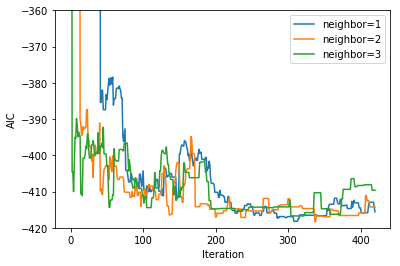

In [168]:
x = range(0, len(f1)) #plot and compare results
fig, ax = plt.subplots()
ax.plot(x, c5, label='neighbor=1') #result from 1(a): 1 neigbhor with same cooling schedule
ax.plot(x, f1, label='neighbor=2')
ax.plot(x, f2, label='neighbor=3')
plt.ylim(-420, -360)
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

From the plot and AIC, iterations to best AIC: 2 neigbhors and 3 neighbors perform similarly. But they all come near best AIC faster than with 1 neighbor.So it might be a better idea to use 2 neigbhors.

## 2(a) Compare the effects of using different mutation rates.

In [169]:
def calculate_fitness(aic_values):
        P = len(aic_values)
        aic_rank = (-aic_values).argsort().argsort()+1.
        return 2.*aic_rank/(P*(P+1.))

Construct a function that take mutation rate as argument, then we can study different AIC from different mutation rates

In [185]:
def ga_mut(rate):    
    pop_size = 20 
    iterations = 100
    mutation_rate = rate

    aic_best = []
    best_solution = []
    aic_history = []
    
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))
    
    for i in range(iterations):
    
    # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
    # Calculate AIC
        current_aic = np.array([aic(LinearRegression().fit(X=x, y=logsalary), x, logsalary) for x in current_phe])
    # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])
    
    # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)
    
    # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
    # Choose second parents randomly
        dads = np.random.choice(range(pop_size), size=int(pop_size/2))
    
        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
        # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
        # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]
        
    # Increment generation
        current_gen = np.array(next_gen)
    # Store AIC values
        aic_history.append(current_aic)
    
    return aic_best,aic_history


In [186]:
t1,m1=ga_mut(0.2)
t2,m2=ga_mut(0.02)
t3,m3=ga_mut(0.002)

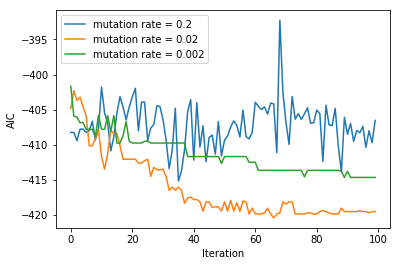

In [191]:
x = range(0, 100)
fig, ax = plt.subplots()
ax.plot(x, t1, label='mutation rate = 0.2')
ax.plot(x, t2, label='mutation rate = 0.02')
ax.plot(x, t3, label='mutation rate = 0.002')
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

compare different mutation rates, we can find with too high mutation rate (0.2): it's hard to reach low AIC; but with too low mutation rate (0.002), solution doesn't change much; so a mutation rate (0.02) that not too high and too low will be a better choice. 

## 2(b) Compare the effects of using different generation sizes.

In [192]:
def ga_mut(size):    
    pop_size = size 
    iterations = 100
    mutation_rate = 0.02

    aic_best = []
    best_solution = []
    aic_history = []
    
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))
    
    for i in range(iterations):
    
    # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
    # Calculate AIC
        current_aic = np.array([aic(LinearRegression().fit(X=x, y=logsalary), x, logsalary) for x in current_phe])
    # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])
    
    # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)
    
    # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
    # Choose second parents randomly
        dads = np.random.choice(range(pop_size), size=int(pop_size/2))
    
        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
        # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
        # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]
        
    # Increment generation
        current_gen = np.array(next_gen)
    # Store AIC values
        aic_history.append(current_aic)
    
    return aic_best,aic_history


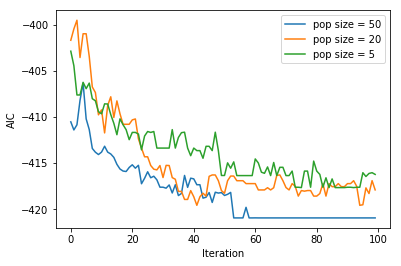

In [194]:
t1,m1=ga_mut(50)
t2,m2=ga_mut(20)
t3,m3=ga_mut(10)
x = range(0, 100)
fig, ax = plt.subplots()
ax.plot(x, t1, label='pop size = 50')
ax.plot(x, t2, label='pop size = 20')
ax.plot(x, t3, label='pop size = 10')
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

Compare different population size, bigger population size will help achieve lower AIC. But bigger population size also need more computation time, so it depends on the balance of time and performance.

## 2(c)Instead of the selection mechanism used in the class example, try using independent selection of both parents with probabilities proportional to their fitness.

In [196]:
    pop_size = 20
    iterations = 100
    mutation_rate = 0.02

    aic_best = []
    best_solution = []
    aic_history = []
    
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))
    
    for i in range(iterations):
    
    # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
    # Calculate AIC
        current_aic = np.array([aic(LinearRegression().fit(X=x, y=logsalary), x, logsalary) for x in current_phe])
    # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])
    
    # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)
    
    # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
    # Choose second parents randomly
        dads = np.random.choice(range(pop_size), size=int(pop_size/2),p=fitness)
    
        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
        # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
        # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]
        
    # Increment generation
        current_gen = np.array(next_gen)
    # Store AIC values
        aic_history.append(current_aic)
    
    


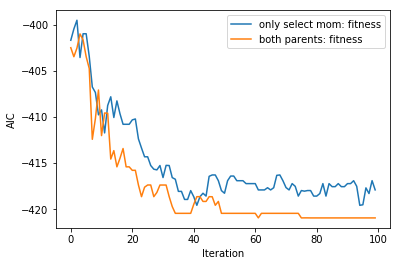

In [197]:
x = range(0, 100)
fig, ax = plt.subplots()
ax.plot(x, t2, label='only select mom: fitness')
ax.plot(x,aic_best,label="both parents: fitness")
plt.xlabel('Iteration')
plt.ylabel('AIC')
ax.legend()

we can see selecting both parents according to their fitness: we get lower AIC and reach nearer stationary stage faster.

## Question 3

Use the combinatorial optimization method of your choice to obtain a solution to the traveling salesman problem for the Brazilian cities described in the lecture notes, using minimum total distance as the criterion. Use the the first city listed in the dataset as "home" (*i.e.* the trip must start and end there). I will award 5 bonus points to the best solution!

In [2]:
def parse_latlon(x):
    d, m, s = map(float, x.split(':'))
    ms = m/60. + s/3600.
    if d<0:
        return d - ms
    return d + ms

cities =  pd.read_csv('../data/brasil_capitals.txt', 
                      names=['city','lat','lon'])[['lat','lon']].applymap(parse_latlon)

In [3]:
allcities = [] #save lat and lon data in allcities
i=0
for lat_val in cities['lat']:
    temp = []
    temp.append(cities['lat'][i])
    temp.append(cities['lon'][i])
    allcities.append(temp)
    i = i + 1

In [34]:
#this code is adapted from https://github.com/BramvdKroef/Traveling-Salesman-Problem/blob/master/TravelingSalesman.py
import math
import random


class City:
   def __init__(self, x, y): #save lat and lon cooridinates as x,y
      
         self.x = x
         self.y = y

   
   def getX(self):
      return self.x
   
   def getY(self):
      return self.y
   
   def distanceTo(self, city):
      distance = np.sqrt( (self.getX() - city.getX())**2 + (self.getY() - city.getY())**2 )
      return distance
   
   def __repr__(self):
      return str(self.getX()) + ", " + str(self.getY())


class TourManager:
   destinationCities = []
   
   def addCity(self, city):
      self.destinationCities.append(city)
   
   def getCity(self, index):
      return self.destinationCities[index]
   
   def numberOfCities(self):
      return len(self.destinationCities)


class Tour:
   def __init__(self, tourmanager, tour=None):
      self.tourmanager = tourmanager
      self.tour = []
      self.fitness = 0.0
      self.distance = 0
      if tour is not None:
         self.tour = tour
      else:
         for i in range(0, self.tourmanager.numberOfCities()):
            self.tour.append(None)
   
   def __len__(self):
      return len(self.tour)
   
   def __getitem__(self, index):
      return self.tour[index]
   
   def __setitem__(self, key, value):
      self.tour[key] = value
   
   def __repr__(self):
      geneString = "|"
      for i in range(0, self.tourSize()):
         geneString += str(self.getCity(i)) + "|"
      return geneString
   
   def generateIndividual(self):
      for cityIndex in range(0, self.tourmanager.numberOfCities()):
         self.setCity(cityIndex, self.tourmanager.getCity(cityIndex))
      random.shuffle(self.tour)
   
   def getCity(self, tourPosition):
      return self.tour[tourPosition]
   
   def setCity(self, tourPosition, city):
      self.tour[tourPosition] = city
      self.fitness = 0.0
      self.distance = 0
   
   def getFitness(self):
      if self.fitness == 0:
         self.fitness = 1/float(self.getDistance())
      return self.fitness
   
   def getDistance(self):
      if self.distance == 0:
         tourDistance = 0
         for cityIndex in range(0, self.tourSize()):
            fromCity = self.getCity(cityIndex)
            destinationCity = None
            if cityIndex+1 < self.tourSize():
               destinationCity = self.getCity(cityIndex+1)
            else:
               destinationCity = self.getCity(0)
            tourDistance += fromCity.distanceTo(destinationCity)
         self.distance = tourDistance
      return self.distance
   
   def tourSize(self):
      return len(self.tour)
   
   def containsCity(self, city):
      return city in self.tour


class Population:
   def __init__(self, tourmanager, populationSize, initialise):
      self.tours = []
      for i in range(0, populationSize):
         self.tours.append(None)
      
      if initialise:
         for i in range(0, populationSize):
            newTour = Tour(tourmanager)
            newTour.generateIndividual()
            self.saveTour(i, newTour)
      
   def __setitem__(self, key, value):
      self.tours[key] = value
   
   def __getitem__(self, index):
      return self.tours[index]
   
   def saveTour(self, index, tour):
      self.tours[index] = tour
   
   def getTour(self, index):
      return self.tours[index]
   
   def getFittest(self):
      fittest = self.tours[0]
      for i in range(0, self.populationSize()):
         if fittest.getFitness() <= self.getTour(i).getFitness():
            fittest = self.getTour(i)
      return fittest
   
   def populationSize(self):
      return len(self.tours)


class GA:
   def __init__(self, tourmanager):
      self.tourmanager = tourmanager
      self.mutationRate = 0.02
      self.tournamentSize = 5
      self.elitism = True
   
   def evolvePopulation(self, pop):
      newPopulation = Population(self.tourmanager, pop.populationSize(), False)
      elitismOffset = 0
      if self.elitism:
         newPopulation.saveTour(0, pop.getFittest())
         elitismOffset = 1
      
      for i in range(elitismOffset, newPopulation.populationSize()):
         parent1 = self.tournamentSelection(pop)
         parent2 = self.tournamentSelection(pop)
         child = self.crossover(parent1, parent2)
         newPopulation.saveTour(i, child)
      
      for i in range(elitismOffset, newPopulation.populationSize()):
         self.mutate(newPopulation.getTour(i))
      
      return newPopulation
   
   def crossover(self, parent1, parent2):
      child = Tour(self.tourmanager)
      
      startPos = int(random.random() * parent1.tourSize())
      endPos = int(random.random() * parent1.tourSize())
      
      for i in range(0, child.tourSize()):
         if startPos < endPos and i > startPos and i < endPos:
            child.setCity(i, parent1.getCity(i))
         elif startPos > endPos:
            if not (i < startPos and i > endPos):
               child.setCity(i, parent1.getCity(i))
      
      for i in range(0, parent2.tourSize()):
         if not child.containsCity(parent2.getCity(i)):
            for ii in range(0, child.tourSize()):
               if child.getCity(ii) == None:
                  child.setCity(ii, parent2.getCity(i))
                  break
      
      return child
   
   def mutate(self, tour):
      for tourPos1 in range(0, tour.tourSize()):
         if random.random() < self.mutationRate:
            tourPos2 = int(tour.tourSize() * random.random())
            
            city1 = tour.getCity(tourPos1)
            city2 = tour.getCity(tourPos2)
            
            tour.setCity(tourPos2, city1)
            tour.setCity(tourPos1, city2)
   
   def tournamentSelection(self, pop):
      tournament = Population(self.tourmanager, self.tournamentSize, False)
      for i in range(0, self.tournamentSize):
         randomId = int(random.random() * pop.populationSize())
         tournament.saveTour(i, pop.getTour(randomId))
      fittest = tournament.getFittest()
      return fittest



if __name__ == '__main__':
   
   tourmanager = TourManager()
   
   for i in range(0,26):
    # Create and add our cities
       city = City(allcities[i][0], allcities[i][1])
       tourmanager.addCity(city)


   # Initialize population
   pop = Population(tourmanager, 50, True);
   
   
   # Evolve population for 50 generations
   ga = GA(tourmanager)
   pop = ga.evolvePopulation(pop)
   for i in range(0, 100):
      pop = ga.evolvePopulation(pop)
   
   # Print final results
   #print "Finished"
   print ("Final Distance: ",str(pop.getFittest().getDistance()))
   print ("Solution:")
   print (pop.getFittest())
   

Final Distance:  142.431055206
Solution:
|47.9297222222, -15.7797222222|49.2538888889, -16.6786111111|56.0966666667, -15.5961111111|67.81, -9.97472222222|63.9038888889, -8.76194444444|60.025, -3.10194444444|60.6733333333, 2.81972222222|51.0663888889, 0.0388888888889|48.5044444444, -1.45583333333|44.3027777778, -2.52972222222|42.8019444444, -5.08916666667|38.5430555556, -3.71722222222|35.2094444444, -5.795|34.8630555556, -7.115|34.8811111111, -8.05388888889|35.7352777778, -9.66583333333|38.5108333333, -12.9711111111|54.6463888889, -20.4427777778|49.2730555556, -25.4277777778|51.23, -30.0330555556|48.5491666667, -27.5966666667|46.6361111111, -23.5475|43.2075, -22.9027777778|43.9377777778, -19.9208333333|40.3377777778, -20.3194444444|48.3602777778, -10.2127777778|


## Question 4

The `../data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use `pandas` to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

In [241]:
# for country "sl"
import glob
import os

path = "../data/ebola/sl_data"
path2="../data/ebola/liberia_data"
path3="../data/ebola/guinea_data"
allsl_files = glob.glob(os.path.join(path, "*.csv")) #make list of paths
alllb_files = glob.glob(os.path.join(path2, "*.csv")) #make list of paths
allgu_files = glob.glob(os.path.join(path3, "*.csv")) #make list of paths

sl = pd.DataFrame()
list = []
for file in allsl_files:
    df = pd.read_csv(file,index_col=None, header=0)
    #daily=
    list.append(df)
sl = pd.concat(list)

lb = pd.DataFrame()
list = []
for file in alllb_files:
    df = pd.read_csv(file,index_col=None, header=0)
    #daily=
    list.append(df)
lb = pd.concat(list)

gu = pd.DataFrame()
list = []
for file in allgu_files:
    df = pd.read_csv(file,index_col=None, header=0)
    #daily=
    list.append(df)
gu = pd.concat(list)

AttributeError: 'DataFrame' object has no attribute 'variable'


checked CDC/WHO definitions for ebola cases:
    noncase:Any suspected or probable case with a negative laboratory result
    confirmed: Any suspected or probably cases with a positive laboratory result.
    suspected: Any person, alive or dead, suffering or having suffered from a sudden onset of high fever and having
had contact with: a suspected, probable or confirmed Ebola or Marburg case
    probable: Any suspected case evaluated by a clinician or Any deceased suspected case (where it has not been possible to collect specimens for laboratory confirmation) having an epidemiological link with a confirmed case
 

In [242]:
#check with sl data
sl.variable.unique()
#choose new cases
newvar=[ 'new_suspected', 'new_probable', 
       'new_confirmed', 'etc_new_admission','cfr'
       ]
#choose death
deathvar=['death_suspected', 'death_probable',
       'death_confirmed',  'etc_new_deaths',
       ]

In [246]:
#check with sl data
sl.variable.unique()
#choose new cases
newvar=[ 'new_suspected', 'new_probable', 
       'new_confirmed', 'etc_new_admission','cfr'
       ]
#choose death
deathvar=['death_suspected', 'death_probable',
       'death_confirmed',  'etc_new_deaths',
       ]
sl2=sl.copy()
sl2=sl2.fillna(0)

sl2new=sl2.loc[sl2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)
sl2death=sl2.loc[sl2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)
sl2new=sl2.loc[sl2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
sl2date=pd.to_datetime( sl2.loc[sl2.variable.isin(newvar),].iloc[:, -2]) #save date for each row
slnew=pd.concat([sl2new,sl2date],axis=1).groupby('date').sum() #group according to row
sl2death=sl2.loc[sl2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
sl2ddate=pd.to_datetime( sl2.loc[sl2.variable.isin(deathvar),].iloc[:, -2])#save date for each row
slde=pd.concat([sl2death,sl2ddate],axis=1).groupby('date').sum() #

slnew.index.name=slde.index.name='date'
slnew.columns=['sl_newcase']
slde.columns=['sl_deaths']
slsum=pd.concat([slnew,slde],axis=1)

In [247]:
slsum

,sl_newcase,sl_deaths
date,,
2014-08-12,286.9,614.0
2014-08-13,270.1,630.0
2014-08-14,244.8,645.0
2014-08-15,248.7,659.0
2014-08-16,247.6,682.0
2014-08-17,220.6,696.0
2014-08-18,337.0,709.0
2014-08-19,274.5,724.0
2014-08-20,222.9,724.0


In [245]:
pd.to_datetime(sl2date)

2    2014-08-12
3    2014-08-12
4    2014-08-12
12   2014-08-12
13   2014-08-12
2    2014-08-13
3    2014-08-13
4    2014-08-13
12   2014-08-13
13   2014-08-13
2    2014-08-14
3    2014-08-14
4    2014-08-14
12   2014-08-14
13   2014-08-14
2    2014-08-15
3    2014-08-15
4    2014-08-15
12   2014-08-15
13   2014-08-15
2    2014-08-16
3    2014-08-16
4    2014-08-16
12   2014-08-16
13   2014-08-16
2    2014-08-17
3    2014-08-17
4    2014-08-17
12   2014-08-17
13   2014-08-17
        ...    
2    2014-11-29
3    2014-11-29
4    2014-11-29
12   2014-11-29
13   2014-11-29
2    2014-12-01
3    2014-12-01
4    2014-12-01
12   2014-12-01
13   2014-12-01
2    2014-12-04
3    2014-12-04
4    2014-12-04
12   2014-12-04
13   2014-12-04
2    2014-12-05
3    2014-12-05
4    2014-12-05
12   2014-12-05
13   2014-12-05
2    2014-12-06
3    2014-12-06
4    2014-12-06
12   2014-12-06
13   2014-12-06
2    2014-12-13
3    2014-12-13
4    2014-12-13
12   2014-12-13
13   2014-12-13
Name: date, Length: 515,

In [174]:
lb.iloc[:5,:]
lb.Variable.unique()

array(['Specimens collected', 'Specimens pending for testing',
       'Total specimens tested', 'Newly reported deaths',
       'Total death/s in confirmed cases',
       'Total death/s in probable cases',
       'Total death/s in suspected cases',
       'Total death/s in confirmed, probable, suspected cases',
       'Case Fatality Rate (CFR) - Confirmed & Probable Cases',
       'Newly reported contacts', 'Total contacts listed',
       'Currently under follow-up', 'Contacts seen',
       'Contacts who completed 21 day follow-up',
       'Contacts lost to follow-up', 'New admissions',
       'Total no. currently in Treatment Units', 'Total discharges',
       'Cumulative admission/isolation', 'Newly Reported Cases in HCW',
       'Cumulative cases among HCW', 'Newly Reported deaths in HCW',
       'Cumulative deaths among HCW', 'New Case/s (Suspected)',
       'New Case/s (Probable)', 'New case/s (confirmed)',
       'Total suspected cases', 'Total probable cases',
       'Total conf

In [188]:
-

In [189]:
lbsum

,liberia_newcase,liberia_deaths
date,,
09/23/2014,188.0,7378.0
09/25/2014,210.0,7728.0
09/26/2014,204.0,8028.0
09/27/2014,74.0,7948.0
10/1/2014,182.0,8372.0
10/10/2014,172.0,4878.0
10/11/14,156.0,2364.0
10/12/14,22.0,4910.0
10/13/14,120.0,4990.0


In [250]:
newvar=['New cases of suspects', 'New cases of probables',
       'New cases of confirmed', 'Total new cases registered so far',
       'Number of male confirmed cases',
       'Number of female confirmed cases',
       'Number of male probables cases',
       'Number of female probables cases', 'Number of male suspects cases',
       'Number of female suspects cases', 
       'Number of confirmed cases among health workers',
       'Number of probables cases among health workers',
       'Number of suspects cases among health workers'
        ]
deathvar=[
       'New deaths registered today',
       'New deaths registered today (confirmed)',
       'New deaths registered today (probables)',
       'New deaths registered today (suspects)',
       'Number of deaths of confirmed cases among health workers',
       'Number of deaths of probables cases among health workers',
       'Number of death of confirmed cases among health workers',
        'New deaths registered',
       'New deaths registered among health workers'
      ]
gu2=gu.copy()
gu2=gu2.fillna(0)

gu2new=gu2.loc[gu2.Description.isin(newvar),].drop(['Date','Description' ],axis=1).replace('-', 0).apply(pd.to_numeric).sum(axis=1)
gu2death=gu2.loc[gu2.Description.isin(deathvar),].drop(['Date','Description' ],axis=1).replace('-', 0).apply(pd.to_numeric).sum(axis=1)
gu2date=pd.to_datetime( gu2.loc[gu2.Description.isin(newvar),].iloc[:, 6] )#save date for each row
gunew=pd.concat([gu2new,gu2date],axis=1).groupby('Date').sum() #group according to row

gu2ddate=pd.to_datetime(gu2.loc[gu2.Description.isin(deathvar),].iloc[:, 6] )#save date for each row
gude=pd.concat([gu2death,gu2ddate],axis=1).groupby('Date').sum() #

gunew.index.name=gude.index.name='Date'
gunew.columns=['guinea_newcase']
gude.columns=['guinea_deaths']
gusum=pd.concat([gunew,gude],axis=1)

In [253]:
gusum

,guinea_newcase,guinea_deaths
Date,,
2014-08-04,1096.0,48.0
2014-08-26,112.0,10.0
2014-08-27,88.0,4.0
2014-08-30,96.0,9.0
2014-08-31,184.0,6.0
2014-09-02,96.0,10.0
2014-09-04,120.0,10.0
2014-09-07,61.0,8.0
2014-09-08,64.0,8.0


In [224]:
from datetime import date, time
from dateutil.parser import parse
from datetime import datetime

In [252]:
tmp=slsum.merge(lbsum,how="outer",left_index=True, right_index=True)
tmp.merge(gusum,how="outer",left_index=True, right_index=True) #final output

,sl_newcase,sl_deaths,liberia_newcase,liberia_deaths,guinea_newcase,guinea_deaths
2014-06-16,NaN,NaN,10.0,51.0,NaN,NaN
2014-06-17,NaN,NaN,8.0,64.0,NaN,NaN
2014-06-22,NaN,NaN,38.0,108.0,NaN,NaN
2014-06-24,NaN,NaN,17.0,136.0,NaN,NaN
2014-06-25,NaN,NaN,22.0,154.0,NaN,NaN
2014-06-28,NaN,NaN,30.0,198.0,NaN,NaN
2014-06-29,NaN,NaN,12.0,196.0,NaN,NaN
2014-07-01,NaN,NaN,8.0,254.0,NaN,NaN
2014-07-02,NaN,NaN,12.0,274.0,NaN,NaN
2014-07-03,NaN,NaN,10.0,288.0,NaN,NaN


In [249]:
gu2=gu.copy()
gu2=gu2.fillna(0)

gu2new=gu2.loc[gu2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)
gu2death=gu2.loc[gu2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)
gu2new=gu2.loc[gu2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
gu2date=pd.to_datetime( gu2.loc[lb2.variable.isin(newvar),].iloc[:, -2]) #save date for each row
gunew=pd.concat([gu2new,gu2date],axis=1).groupby('date').sum() #group according to row

gu2death=gu2.loc[gu2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
gu2ddate=pd.to_datetime( gu2.loc[gu2.variable.isin(deathvar),].iloc[:, -2]) #save date for each row
gude=pd.concat([gu2death,gu2ddate],axis=1).groupby('date').sum() #

gunew.index.name=gude.index.name='date'
gunew.columns=['guinea_newcase']
gude.columns=['guinea_deaths']
gusum=pd.concat([gunew,gude],axis=1)

AttributeError: 'DataFrame' object has no attribute 'variable'

In [165]:
gusum

,guinea_newcase,guinea_deaths
date,,
2014-08-12,67.0,614.0
2014-08-13,51.0,630.0
2014-08-14,35.0,645.0
2014-08-15,40.0,659.0
2014-08-16,54.0,682.0
2014-08-17,8.0,696.0
2014-08-18,122.0,709.0
2014-08-19,65.0,724.0
2014-08-20,14.0,724.0


In [139]:

sl2=sl.copy()
sl2.fillna(0)

sl2new=sl2.loc[sl2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)
sl2death=sl2.loc[sl2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1)

In [140]:
sl2new=sl2.loc[sl2.variable.isin(newvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
sl2date=sl2.loc[sl2.variable.isin(newvar),].iloc[:, -2] #save date for each row
slnew=pd.concat([sl2new,sl2date],axis=1).groupby('date').sum() #group according to row
sl2death=sl2.loc[sl2.variable.isin(deathvar),].iloc[:, :-2].replace('-', 0).apply(pd.to_numeric).sum(axis=1) #sum each row
sl2ddate=sl2.loc[sl2.variable.isin(deathvar),].iloc[:, -2] #save date for each row
slde=pd.concat([sl2death,sl2ddate],axis=1).groupby('date').sum() #

In [141]:
slnew.index.name=slde.index.name='date'
slnew.columns=['newcase']
slde.columns=['deaths']
pd.concat([slnew,slde],axis=1)

,newcase,deaths
date,,
2014-08-12,75.0,614.0
2014-08-13,77.0,630.0
2014-08-14,87.0,645.0
2014-08-15,70.0,659.0
2014-08-16,72.0,682.0
2014-08-17,34.0,696.0
2014-08-18,122.0,709.0
2014-08-19,101.0,724.0
2014-08-20,22.0,724.0


In [110]:
pd.

['newcases', 'death']

In [51]:
sl2.iloc[:5,:]

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,0.0,654142,0.0,494139,168729,0.0,465048,341690,653013,0.0,...,557978,335574,434937,0.0,0.0,0.0,263619,1040888,2014-08-12,population
1,0.0,0,0.0,0,0,0.0,0,0,3,0.0,...,1,0,0,0.0,0.0,0.0,0,0,2014-08-12,new_noncase
2,0.0,1,0.0,0,0,0.0,0,0,9,0.0,...,0,0,0,0.0,0.0,0.0,0,0,2014-08-12,new_suspected
3,0.0,1,0.0,0,0,0.0,0,0,0,0.0,...,0,0,0,0.0,0.0,0.0,0,0,2014-08-12,new_probable
4,0.0,0,0.0,0,0,0.0,0,0,9,0.0,...,2,0,0,0.0,0.0,0.0,0,0,2014-08-12,new_confirmed


In [258]:
d1.loc[d1.variable=="new_confirmed",]

,date,variable,Kailahun,Kenema,Kono,Kambia,Koinadugu,Bombali,Tonkolili,Port Loko,Pujehun,Bo,Moyamba,Bonthe,Western area urban,Western area rural,National
4,2014-08-13,new_confirmed,11,1,0,0,0,0,0,0,0,1,0,0,2,0,15


In [259]:
d1.loc[d1.variable.isin(['etc_new_deaths','death_confirmed','death_']),]

,date,variable,Kailahun,Kenema,Kono,Kambia,Koinadugu,Bombali,Tonkolili,Port Loko,Pujehun,Bo,Moyamba,Bonthe,Western area urban,Western area rural,National
11,2014-08-13,death_confirmed,157,107,0,0,0,1,0,1,0,2,3,0,2,0,273
16,2014-08-13,etc_new_deaths,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
d2=d1.copy()

In [21]:
d2=d2.fillna(0) #treat na: fill with 0 instead

In [24]:
d2.loc[d2.variable.isin(['etc_new_deaths','death_confirmed','death_suspected','death_probable']),]

,date,variable,Kailahun,Kenema,Kono,Kambia,Koinadugu,Bombali,Tonkolili,Port Loko,Pujehun,Bo,Moyamba,Bonthe,Western area urban,Western area rural,National
9,2014-08-13,death_suspected,2,1,0,0,0,0,0,1,0,0,0,0,1,0,5
10,2014-08-13,death_probable,32,0,0,0,0,0,0,1,0,0,0,0,1,0,34
11,2014-08-13,death_confirmed,157,107,0,0,0,1,0,1,0,2,3,0,2,0,273
16,2014-08-13,etc_new_deaths,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
glob.glob(os.path.join(path, "*.csv"))

['../data/ebola/sl_data/2014-08-12-v77.csv',
 '../data/ebola/sl_data/2014-08-13-v78.csv',
 '../data/ebola/sl_data/2014-08-14-v79.csv',
 '../data/ebola/sl_data/2014-08-15-v80.csv',
 '../data/ebola/sl_data/2014-08-16-v81.csv',
 '../data/ebola/sl_data/2014-08-17-v82.csv',
 '../data/ebola/sl_data/2014-08-18-v83.csv',
 '../data/ebola/sl_data/2014-08-19-v84.csv',
 '../data/ebola/sl_data/2014-08-20-v85.csv',
 '../data/ebola/sl_data/2014-08-21-v86.csv',
 '../data/ebola/sl_data/2014-08-22-v87.csv',
 '../data/ebola/sl_data/2014-08-23-v88.csv',
 '../data/ebola/sl_data/2014-08-24-v89.csv',
 '../data/ebola/sl_data/2014-08-25-v90.csv',
 '../data/ebola/sl_data/2014-08-26-v91.csv',
 '../data/ebola/sl_data/2014-08-27-v92.csv',
 '../data/ebola/sl_data/2014-08-28-v93.csv',
 '../data/ebola/sl_data/2014-08-29-v94.csv',
 '../data/ebola/sl_data/2014-08-30-v95.csv',
 '../data/ebola/sl_data/2014-08-31-v96.csv',
 '../data/ebola/sl_data/2014-09-01-v97.csv',
 '../data/ebola/sl_data/2014-09-02-v98.csv',
 '../data/

In [215]:
pwd

'/Users/ying/Bios8366/homework'